<a href="https://colab.research.google.com/github/satyajitghana/PadhAI-Course/blob/master/colab-notebooks/04_MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install sklearn

In [0]:
import sklearn.datasets
import numpy as np
import pandas as pd

# Loading Dataset

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [52]:
type(X), type(Y), X.shape, Y.shape

(numpy.ndarray, numpy.ndarray, (569, 30), (569,))

In [53]:
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [0]:
data['class'] = breast_cancer.target

In [56]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [57]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [58]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [59]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [60]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Test Train Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('class', axis=1)
Y = data['class']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [64]:
X.shape, X_train.shape, X_test.shape

((569, 30), (426, 30), (143, 30))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [66]:
Y.mean(), Y_train.mean(), Y_test.mean()

(0.6274165202108963, 0.619140625, 0.7017543859649122)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

In [68]:
X.mean(), X_train.mean(), X_test.mean()

(mean radius                 14.127292
 mean texture                19.289649
 mean perimeter              91.969033
 mean area                  654.889104
 mean smoothness              0.096360
 mean compactness             0.104341
 mean concavity               0.088799
 mean concave points          0.048919
 mean symmetry                0.181162
 mean fractal dimension       0.062798
 radius error                 0.405172
 texture error                1.216853
 perimeter error              2.866059
 area error                  40.337079
 smoothness error             0.007041
 compactness error            0.025478
 concavity error              0.031894
 concave points error         0.011796
 symmetry error               0.020542
 fractal dimension error      0.003795
 worst radius                16.269190
 worst texture               25.677223
 worst perimeter            107.261213
 worst area                 880.583128
 worst smoothness             0.132369
 worst compactness       

# Binarisation of Input

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

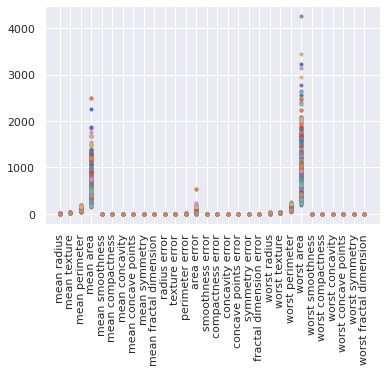

In [70]:
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

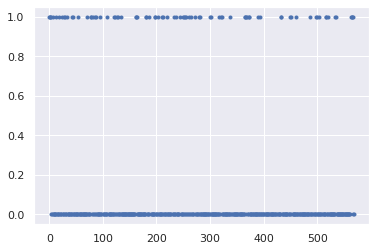

In [72]:
plt.plot(X_binarised_3_train, '.')

In [0]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1, 0])

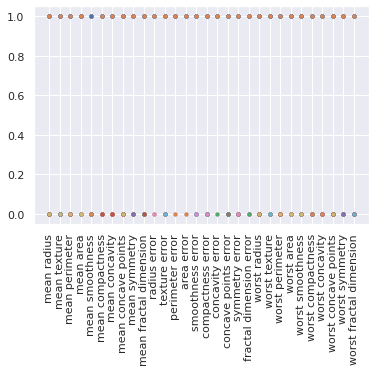

In [74]:
plt.plot(X_binarised_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1, 0])

In [0]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [77]:
type(X_binarised_train)

numpy.ndarray

# MP Neuron Model

In [0]:
from random import randint

In [79]:
b = 3

i = randint(0, X_binarised_train.shape[0])

print('For row', i)

if (np.sum(X_binarised_train[100, :]) >= b):
    print('MP Neuron inference is malignant')
else:
    print('MP Neuron inference is benign')

if (Y_train[i] == 1):
    print('Ground truth is malignant')
else:
    print('Ground truth is benign')

For row 53
MP Neuron inference is malignant
Ground truth is benign


In [80]:
b = 3

Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/X_binarised_train.shape[0])

321 0.626953125


In [81]:
for b in range(X_binarised_train.shape[1] + 1):
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_binarised_train, Y_train):
        y_pred = (np.sum(x) >= b)
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_binarised_train.shape[0])

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 322 0.62890625
14 324 0.6328125
15 326 0.63671875
16 330 0.64453125
17 335 0.654296875
18 338 0.66015625
19 341 0.666015625
20 344 0.671875
21 354 0.69140625
22 363 0.708984375
23 374 0.73046875
24 395 0.771484375
25 407 0.794921875
26 422 0.82421875
27 438 0.85546875
28 437 0.853515625
29 417 0.814453125
30 384 0.75


In [0]:
from sklearn.metrics import accuracy_score

In [83]:
b = 28
Y_pred_test = []
accurate_rows = 0

for x in X_binarised_test:
    y_pred = (np.sum(x) >= b)
    Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test, Y_test)
    
print(b, accuracy)

28 0.7192982456140351


# MP Neuron Class

In [0]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
        
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.asarray(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
            
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b is ', best_b)
        print('Highest accuracy is ', accuracy[best_b])

In [85]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is  27
Highest accuracy is  0.85546875


In [0]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [87]:
accuracy_test

0.7719298245614035

# Perceptron Class

In [0]:
X_train = X_train.values
X_test = X_test.values

In [0]:
class Perceptron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.asarray(Y)
    """
    lr = learning rate
    epochs = number of time to iterate over all the data
    """
    def fit(self, X, Y, epochs = 1, lr = 1):
        
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0
        
        wt_matrix = []
                
        for i in range(epochs):
            wt_matrix.append(self.w)
            for x, y in zip(X, Y):
                y_pred = self.model(x)

                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            
            accuracy[i] = accuracy_score(self.predict(X), Y)

            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
                
        self.w = chkptw
        self.b = chkptb
                
        print('Highest Accuracy ', max_accuracy)
        plt.plot(list(accuracy.values()), '-.')
        plt.ylim([0, 1])
        plt.show()
        
        
        return np.asarray(wt_matrix)

In [0]:
perceptron = Perceptron()

Highest Accuracy  0.92578125


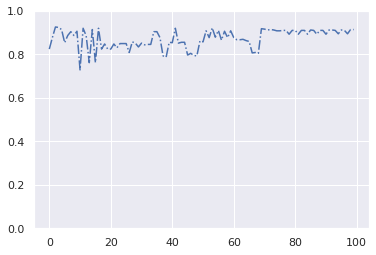

In [91]:
wt_matrix = perceptron.fit(X_train, Y_train, epochs=100, lr=1)

In [92]:
Y_pred_train = perceptron.predict(X_train)
accuracy_score(Y_pred_train, Y_train)

0.92578125

In [93]:
Y_pred_test = perceptron.predict(X_test)
accuracy_score(Y_pred_test, Y_test)

0.8421052631578947

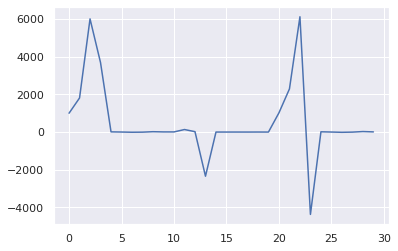

In [94]:
plt.plot(perceptron.w)
plt.show()

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import seaborn as sns
sns.set()

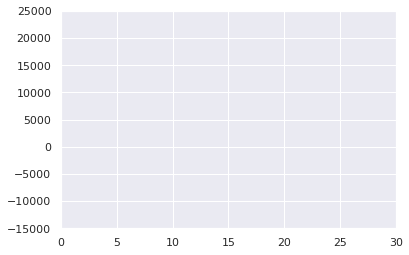

In [97]:
fig, ax = plt.subplots()

ax.set_xlim((0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [100]:
HTML(anim.to_html5_video())